In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# this line tells the notebook to show plots "inline"
%matplotlib inline

# Import Dataset

In [6]:
data = pd.read_csv('drive/My Drive/datasets/StudentsPerformance.csv')

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.shape

(1000, 8)

In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# checking data contains any NULL values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data Visualization

In [11]:
size = data['gender'].value_counts()
print(size)

female    518
male      482
Name: gender, dtype: int64


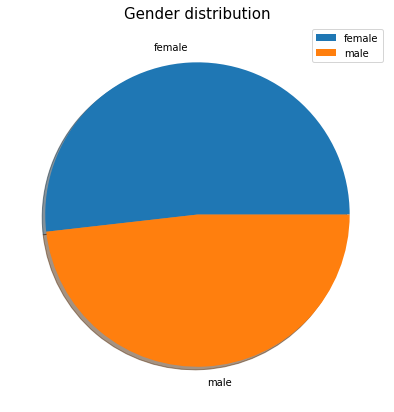

In [12]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size,labels=["female","male"],shadow=True)
plt.title("Gender distribution",fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

In [13]:
size = data['lunch'].value_counts()
print(size)

standard        645
free/reduced    355
Name: lunch, dtype: int64


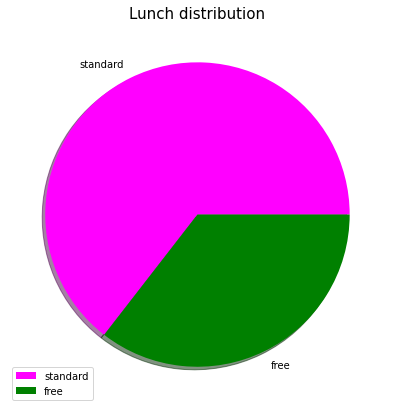

In [14]:
plt.rcParams['figure.figsize'] = (7, 7)
colors = ["magenta", "green"]
plt.pie(size,labels=["standard","free"],shadow=True,colors=colors)
plt.title("Lunch distribution",fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

In [15]:
# visualizing diversity of class
diversity = data['race/ethnicity'].value_counts()
print(diversity)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


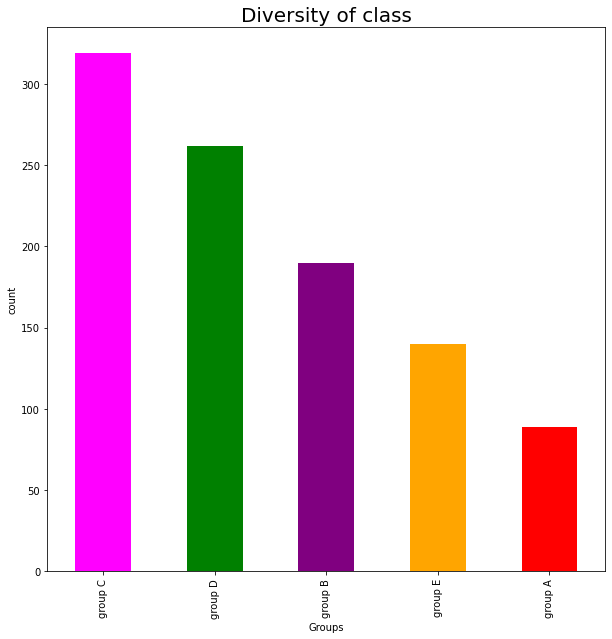

In [16]:
plt.rcParams['figure.figsize'] = (10, 10)
diversity.plot.bar(color=["magenta", "green", "purple", "orange","red"])
plt.title('Diversity of class', fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

In [17]:
# visualizing parental education of class
pEducation = data['parental level of education'].value_counts()
print(pEducation)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


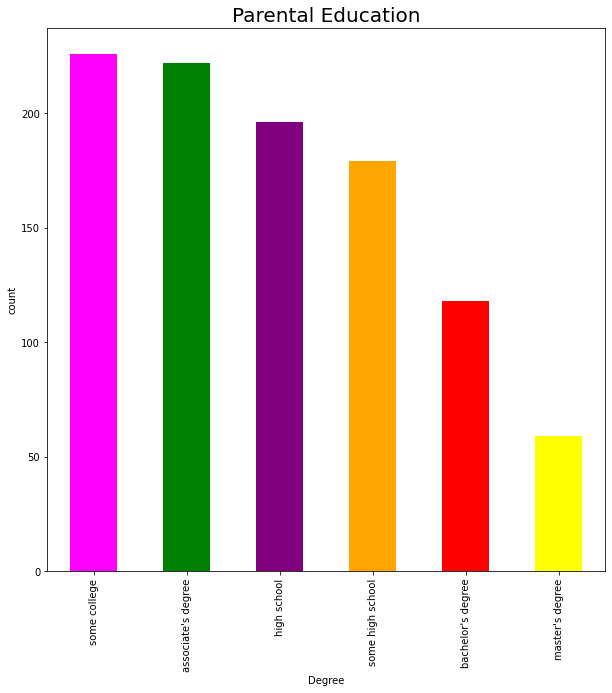

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)
pEducation.plot.bar(color=["magenta", "green", "purple", "orange","red","yellow"])
plt.title('Parental Education', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

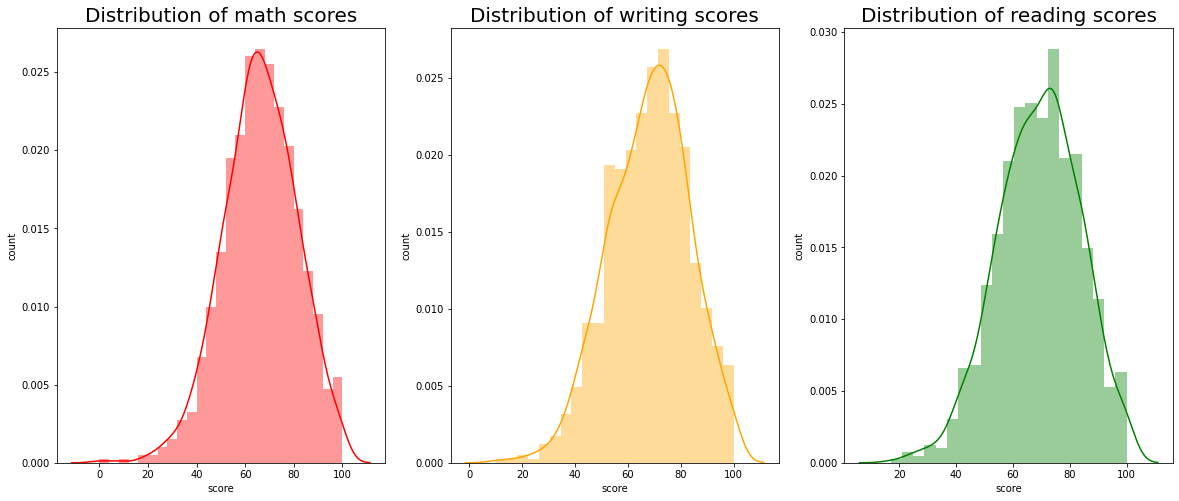

In [19]:
# visualizing subject scores (math/read/write)

plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(data['math score'], color = 'red')
plt.title('Distribution of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(data['writing score'], color = 'orange')
plt.title('Distribution of writing scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(data['reading score'], color = 'green')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()

In [21]:
x = pd.crosstab(data['gender'], data['race/ethnicity'])
print(x)

race/ethnicity  group A  group B  group C  group D  group E
gender                                                     
female               36      104      180      129       69
male                 53       86      139      133       71


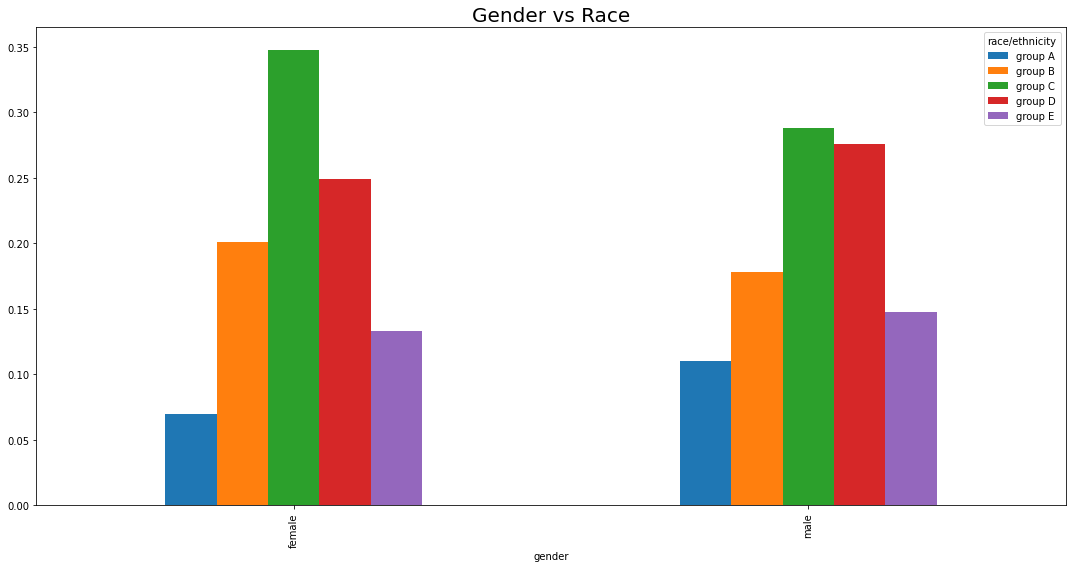

In [22]:
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = False,
                                             figsize = (15, 8))

plt.title('Gender vs Race', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

In [23]:
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
print(x)

parental level of education  associate's degree  ...  some high school
race/ethnicity                                   ...                  
group A                                      14  ...                24
group B                                      41  ...                38
group C                                      78  ...                49
group D                                      50  ...                50
group E                                      39  ...                18

[5 rows x 6 columns]


In [24]:
x.div(x.sum(1).astype(float), axis = 0)

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,0.157303,0.134831,0.202247,0.033708,0.202247,0.269663
group B,0.215789,0.105263,0.252632,0.031579,0.194737,0.200000
group C,0.244514,0.125392,0.200627,0.059561,0.216301,0.153605
group D,0.190840,0.106870,0.167939,0.087786,0.255725,0.190840
group E,0.278571,0.128571,0.157143,0.057143,0.250000,0.128571


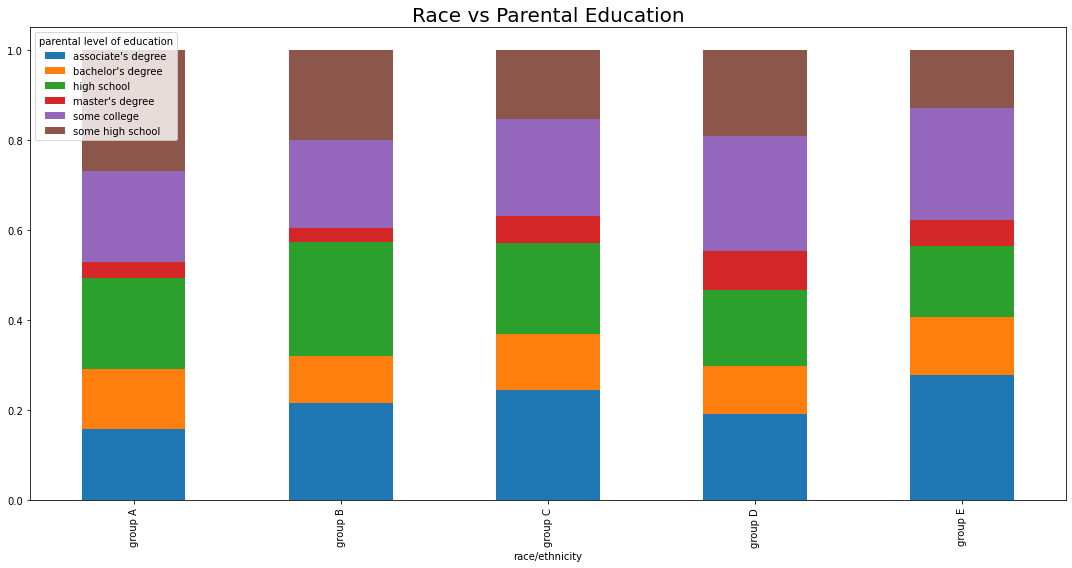

In [25]:
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = 'True',
                                             figsize = (15, 8))

plt.title('Race vs Parental Education', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

In [26]:
passmarks = 40

data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

In [27]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass


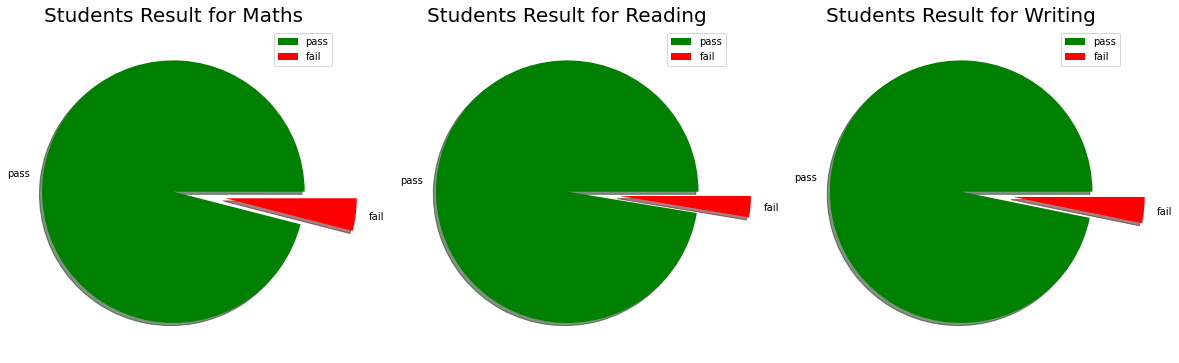

In [28]:
labels = "pass", "fail"
explode = [0, 0.4]

size = data['pass_math'].value_counts()
plt.subplot(1, 3, 1)
plt.pie(size, colors =["green","red"], labels = labels, shadow = True,explode = explode)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = data['pass_reading'].value_counts()
plt.subplot(1, 3, 2)
plt.pie(size, colors =["green","red"], labels = labels, shadow = True,explode = explode)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = data['pass_writing'].value_counts()
plt.subplot(1, 3, 3)

plt.pie(size, colors =["green","red"], labels = labels, shadow = True,explode = explode)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()

plt.show()

In [29]:
# Total score for students
from math import * 

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['percentage'] = data['total_score']/3

In [30]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,49.333333
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,76.333333


In [31]:
for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


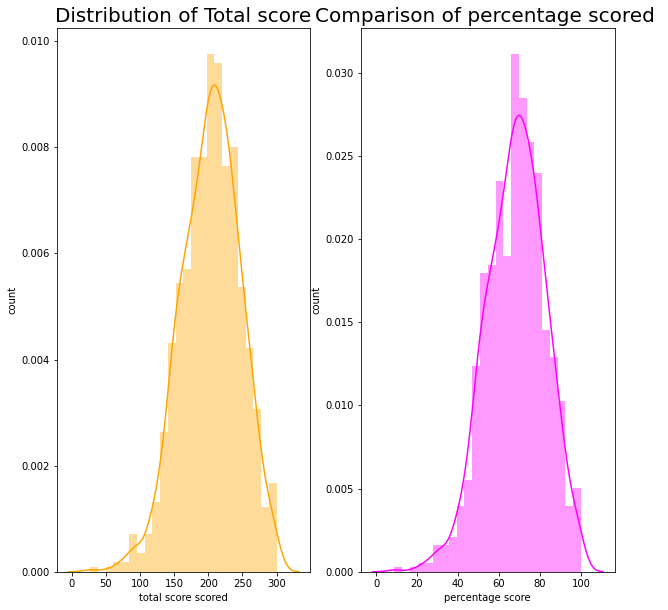

In [33]:
plt.rcParams['figure.figsize'] = (10, 10)

plt.subplot(1, 2, 1)
sns.distplot(data['total_score'],color='orange')
plt.title('Distribution of Total score', fontsize = 20)
plt.xlabel('total score scored')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.distplot(data['percentage'], color = 'magenta')
plt.title('Comparison of percentage scored ', fontsize = 20)
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

plt.show()

In [34]:
data.shape

(1000, 13)

In [35]:
data['status']='Pass'
for i in range(1000):
  if data['pass_math'][i]=='Fail' or data['pass_reading'][i]=='Fail' or data['pass_writing'][i]=='Fail':
    data['status'][i]='Fail'
  else:
    data['status'][i]='Pass'
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,Pass


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


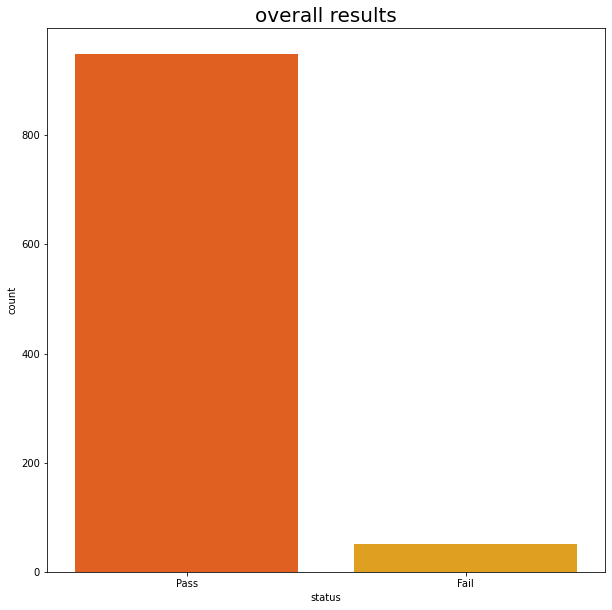

In [37]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.countplot(data['status'], palette = 'autumn')
plt.title('overall results', fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [38]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

In [39]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,Pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,Pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,Pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,Pass,B


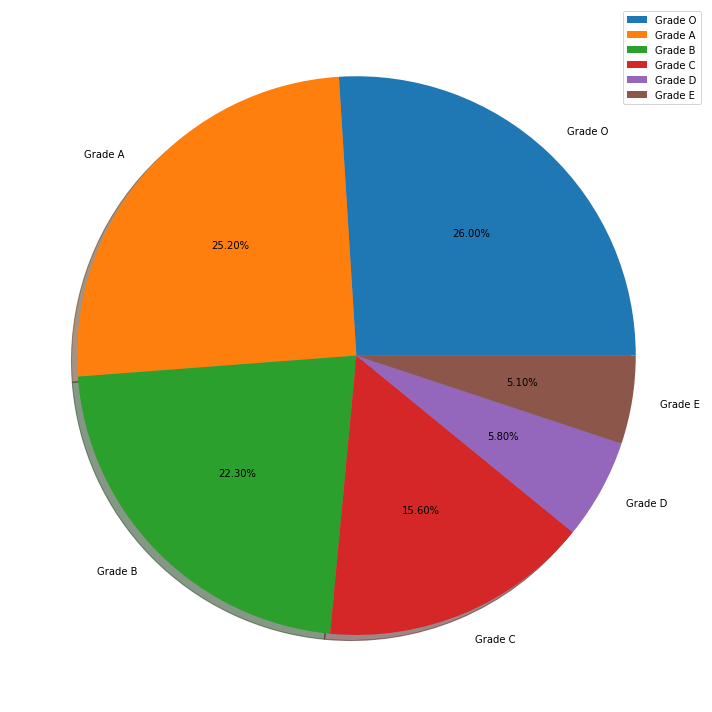

In [40]:
# plotting a pie chart for the distribution of various grades amongst the students
labels = ['Grade O', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = data['grades'].value_counts()

plt.pie(sizes, labels = labels, shadow = True,autopct = '%.2f%%')
plt.legend(loc = 'upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

In [41]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,Pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,Pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,Pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,Pass,B


In [42]:
# comparison parent's degree and their corresponding grades
x = pd.crosstab(data['parental level of education'], data['grades'])
print(x)

grades                        A   B   C   D   E   O
parental level of education                        
associate's degree           36  59  50  53   5  19
bachelor's degree            22  32  31  16   4  13
high school                  19  47  54  57  16   3
master's degree              15  14  14   9   0   7
some college                 36  63  64  41  10  12
some high school             28  45  39  47  16   4


In [45]:
x.div(x.sum(1).astype(float), axis = 0)

grades,A,B,C,D,E,O
parental level of education,,,,,,
associate's degree,0.162162,0.265766,0.225225,0.238739,0.022523,0.085586
bachelor's degree,0.186441,0.271186,0.262712,0.135593,0.033898,0.110169
high school,0.096939,0.239796,0.275510,0.290816,0.081633,0.015306
master's degree,0.254237,0.237288,0.237288,0.152542,0.000000,0.118644
some college,0.159292,0.278761,0.283186,0.181416,0.044248,0.053097
some high school,0.156425,0.251397,0.217877,0.262570,0.089385,0.022346


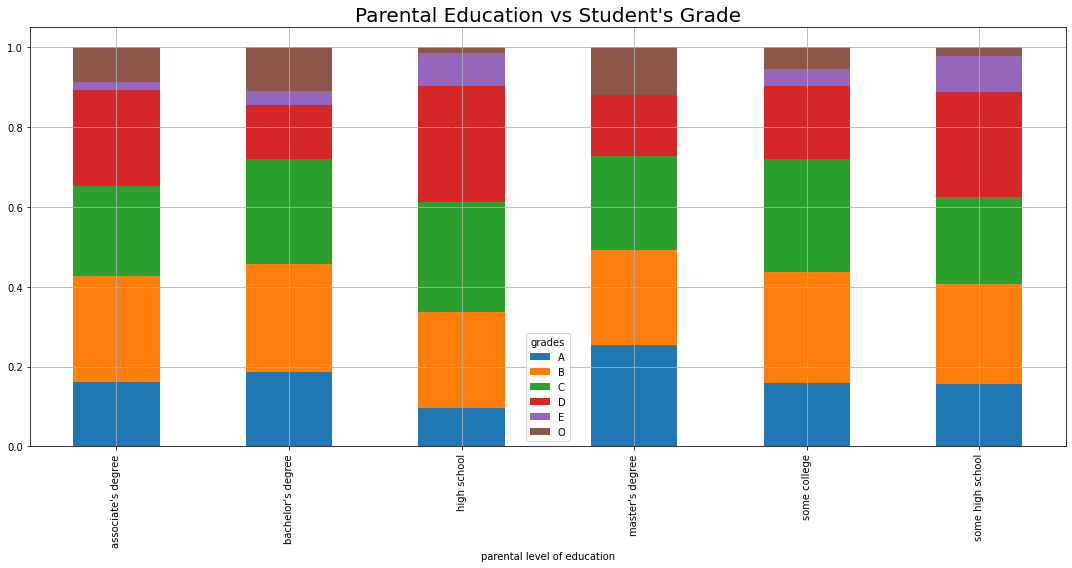

In [46]:
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True,
                                             figsize = (15, 8))

plt.title("Parental Education vs Student's Grade", fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


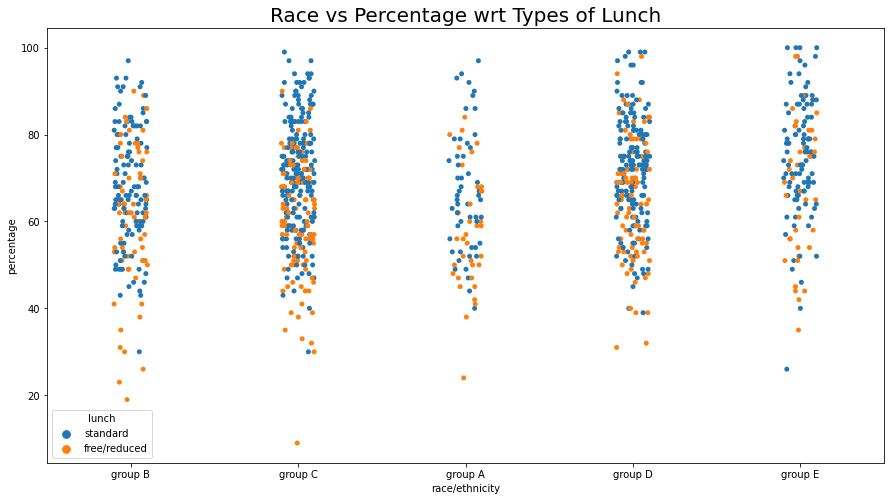

In [51]:
# race vs gender vs lunch
plt.rcParams['figure.figsize'] = (15, 8)
sns.stripplot(data['race/ethnicity'], data['percentage'], hue = data['lunch'])
plt.title('Race vs Percentage wrt Types of Lunch', fontsize = 20)
plt.show()

In [52]:
data.corr()

,math score,reading score,writing score,total_score,percentage
math score,1.000000,0.817580,0.802642,0.918746,0.918521
reading score,0.817580,1.000000,0.954598,0.970331,0.970271
writing score,0.802642,0.954598,1.000000,0.965667,0.965422
total_score,0.918746,0.970331,0.965667,1.000000,0.999813
percentage,0.918521,0.970271,0.965422,0.999813,1.000000


Text(0.5, 1.0, 'Correlations between the attributes')

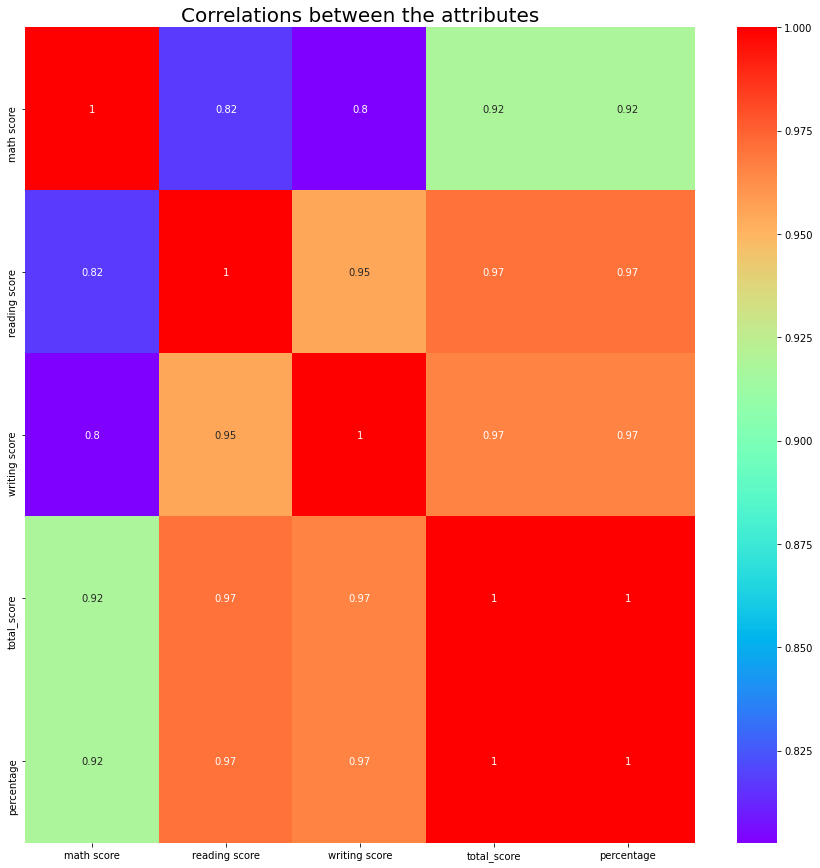

In [53]:
# heatmap
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(data.corr(), cmap = 'rainbow', annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

# Data Preprocessing

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['gender'] = le.fit_transform(data['gender'])
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['status'] = le.fit_transform(data['status'])

In [56]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,0,group B,1,1,1,72,72,74,1,1,1,218,73.0,1,B
1,0,group C,4,1,0,69,90,88,1,1,1,247,83.0,1,A
2,0,group B,3,1,1,90,95,93,1,1,1,278,93.0,1,O
3,1,group A,0,0,1,47,57,44,1,1,1,148,50.0,1,D
4,1,group C,4,1,1,76,78,75,1,1,1,229,77.0,1,B


In [57]:
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

In [58]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,0,2,1,1,1,72,72,74,1,1,1,218,73.0,1,2
1,0,3,4,1,0,69,90,88,1,1,1,247,83.0,1,1
2,0,2,3,1,1,90,95,93,1,1,1,278,93.0,1,0
3,1,1,0,0,1,47,57,44,1,1,1,148,50.0,1,4
4,1,3,4,1,1,76,78,75,1,1,1,229,77.0,1,2


# Splitting Dataset

In [61]:
X = data.iloc[:,:14]
y = data.iloc[:,14]
print(X.shape)
print(y.shape)

(1000, 14)
(1000,)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


# Scaling dataset

In [64]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [65]:
X_train[0]

array([0.        , 0.25      , 0.2       , 0.        , 1.        ,
       0.75      , 0.81927711, 0.8       , 1.        , 1.        ,
       1.        , 0.78754579, 0.79120879, 1.        ])

# ML Modelling

# Logistic Regression

In [66]:
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.8546666666666667
Testing Accuracy : 0.82


Confusion Matrix for Logistic Regression

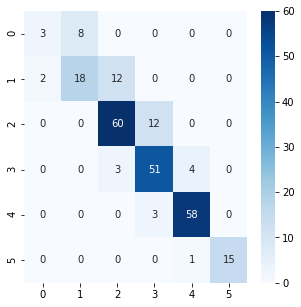

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

Classification Report

In [69]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.69      0.56      0.62        32
           2       0.80      0.83      0.82        72
           3       0.77      0.88      0.82        58
           4       0.92      0.95      0.94        61
           5       1.00      0.94      0.97        16

    accuracy                           0.82       250
   macro avg       0.80      0.74      0.76       250
weighted avg       0.81      0.82      0.81       250



# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit( X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


Confusion Matrix

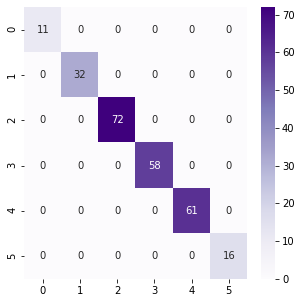

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Purples')

Classification Report

In [73]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        16

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



K-Fold Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)
print(accuracies)
print("mean accuracy :", accuracies.mean())
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0
